### **Libraries**

In [1]:
# import libaraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import data
data = pd.read_table("karate.txt", sep="\t", index_col=0)
data.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34
Personnes,,,,,,,,,,,,,,,,,,,,,
p1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
p2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
p3,1,1,0,1,0,0,0,1,1,1,...,0,0,0,1,1,0,0,0,1,0
p4,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
p5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# shape of data
data.shape

(34, 34)

In [4]:
# list of person
data.index

Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11',
       'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21',
       'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31',
       'p32', 'p33', 'p34'],
      dtype='object', name='Personnes')

In [5]:
data.columns

Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11',
       'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21',
       'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31',
       'p32', 'p33', 'p34'],
      dtype='object')

### **igraph**

In [6]:
# import igraph
import igraph as ig

In [40]:
# transform data to graph
g = ig.Graph.Adjacency(data.values.tolist(), mode='undirected')

# Display the type of the created object
print(type(g))


<class 'igraph.Graph'>


In [41]:
# number of nodes
g.vcount()

34

In [42]:
# number of edges
g.ecount()

78

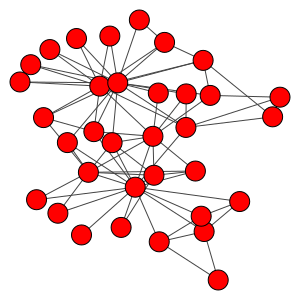

In [43]:
# plot the graph
ig.plot(g, bbox=(0, 0, 300, 300), vertex_size=20,vertex_label_size=10, edge_width=1, edge_arrow_size=0.5)


In [44]:
# Method 1: Using adjacency matrix (data)
neighbors_from_matrix = data.loc['p11'].sum()
print(f"Number of neighbors for p11 using adjacency matrix: {neighbors_from_matrix}")


Number of neighbors for p11 using adjacency matrix: 3


In [45]:
# Method 2: Using igraph object (g)
neighbors_from_igraph = g.neighborhood_size(10)
print(f"Number of neighbors for p11 using igraph: {neighbors_from_igraph}")

Number of neighbors for p11 using igraph: 4


In [46]:
# list of neighbors
neighbors = g.neighborhood(10)
print(f"Neighbors of p11: {neighbors}")

Neighbors of p11: [10, 0, 4, 5]


### **Centralité**

In [51]:
# Calculate degree centrality for each node (sum of each row in the adjacency matrix)
degree_centrality = data.sum(axis=1)

# Create a DataFrame with the degree centrality values
centrality_df = pd.DataFrame({'Person': data.index, 'Degree_Centrality': degree_centrality})



In [52]:
# te 3 most central characters
top_3_central = centrality_df.sort_values('Degree_Centrality', ascending=False).head(3)
print(top_3_central)

          Person  Degree_Centrality
Personnes                          
p34          p34                 17
p1            p1                 16
p33          p33                 12


In [53]:
# calculate the degree of each node
degree = g.degree()

# Create a DataFrame with the degree values
degree_df = pd.DataFrame({'Person': data.index, 'Degree': degree})

# Display the 3 most central characters
top_3_degree = degree_df.sort_values('Degree', ascending=False).head(3)
print(top_3_degree)

   Person  Degree
33    p34      17
0      p1      16
32    p33      12


In [55]:
# matrice of distance
distance_matrix = g.distances()

# print the distance matrix
print(distance_matrix)

# type of distance matrix
print(type(distance_matrix))

[[0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2], [1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 1, 2, 2, 2], [1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 1, 2], [1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2], [1, 2, 2, 2, 0, 2, 1, 2, 2, 3, 1, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 3, 3, 4, 3, 3, 4, 3, 2, 3, 3], [1, 2, 2, 2, 2, 0, 1, 2, 2, 3, 1, 2, 2, 2, 4, 4, 1, 2, 4, 2, 4, 2, 4, 4, 3, 3, 4, 3, 3, 4, 3, 2, 3, 3], [1, 2, 2, 2, 1, 1, 0, 2, 2, 3, 2, 2, 2, 2, 4, 4, 1, 2, 4, 2, 4, 2, 4, 4, 3, 3, 4, 3, 3, 4, 3, 2, 3, 3], [1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 4, 2, 2, 3, 2, 2, 2, 3], [1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 2, 1, 1], [2, 2, 1, 2, 3, 3, 3, 2, 2, 0, 3, 3, 3, 2, 2, 2, 4, 3, 2, 2, 2,

In [56]:
# len of distance matrix
print(len(distance_matrix))

34


In [59]:
# transfrom distance matrix to numpy matrix
distance_matrix_np = np.array(distance_matrix)
distance_matrix_np.shape

(34, 34)

In [60]:
# max value of distance matrix
max_distance = np.max(distance_matrix_np)
print(f"Maximum distance between any two nodes: {max_distance}")

Maximum distance between any two nodes: 5


In [61]:
# Create a list to store the pairs
max_distance_pairs = []

# Iterate through the distance matrix to find pairs with max distance
for i in range(len(distance_matrix_np)):
    for j in range(i + 1):  # Use i + 1 to avoid duplicates due to undirected graph
        if distance_matrix_np[i][j] == max_distance:
            # Get the person names using data.index
            person1 = data.index[i]
            person2 = data.index[j]
            max_distance_pairs.append((person1, person2))

# Display the pairs
print("Pairs of vertices with maximum distance (5):")
print(max_distance_pairs)

Pairs of vertices with maximum distance (5):
[('p17', 'p15'), ('p17', 'p16'), ('p19', 'p17'), ('p21', 'p17'), ('p23', 'p17'), ('p24', 'p17'), ('p27', 'p17'), ('p30', 'p17')]


In [62]:
# Calculate closeness centrality (mean distance to other nodes) for each vertex
closeness = []
n = len(distance_matrix_np)

for i in range(n):
    # Calculate average distance to all other nodes
    avg_distance = sum(distance_matrix_np[i]) / (n-1)  # n-1 because we exclude distance to self
    closeness.append(avg_distance)

# Create DataFrame with results
closeness_df = pd.DataFrame({
    'Person': data.index,
    'Closeness': closeness
})

# Sort by closeness and get top 3 lowest values
top_3_lowest = closeness_df.sort_values('Closeness').head(3)

# Calculate inverse of closeness for these vertices
top_3_lowest['Inverse_Closeness'] = 1 / top_3_lowest['Closeness']

print("Three vertices with lowest closeness centrality:")
print(top_3_lowest)

Three vertices with lowest closeness centrality:
   Person  Closeness  Inverse_Closeness
0      p1   1.757576           0.568966
2      p3   1.787879           0.559322
33    p34   1.818182           0.550000


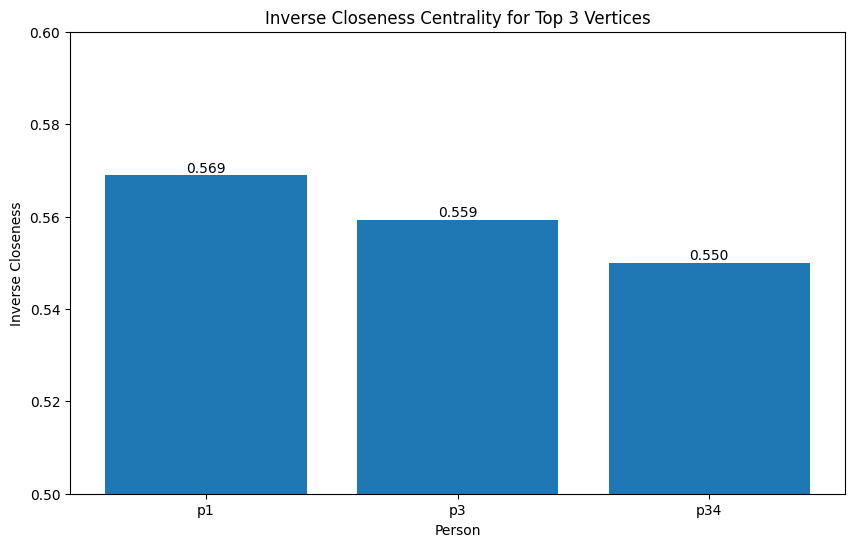

In [63]:
# Create a bar plot of the inverse closeness values for the top 3 vertices
plt.figure(figsize=(10, 6))
plt.bar(top_3_lowest['Person'], top_3_lowest['Inverse_Closeness'])
plt.title('Inverse Closeness Centrality for Top 3 Vertices')
plt.xlabel('Person')
plt.ylabel('Inverse Closeness')
plt.ylim(0.5, 0.6)  # Set y-axis limits for better visualization

# Add value labels on top of each bar
for i, v in enumerate(top_3_lowest['Inverse_Closeness']):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.show()

In [64]:
# Calculate betweenness centrality
betweenness = g.betweenness()

# Create DataFrame with results
betweenness_df = pd.DataFrame({
    'Person': data.index,
    'Betweenness': betweenness
})

# Sort and get top 3
top_3_betweenness = betweenness_df.sort_values('Betweenness', ascending=False).head(3)
print("Three vertices with highest betweenness centrality:")
print(top_3_betweenness)

Three vertices with highest betweenness centrality:
   Person  Betweenness
0      p1   231.071429
33    p34   160.551587
32    p33    76.690476


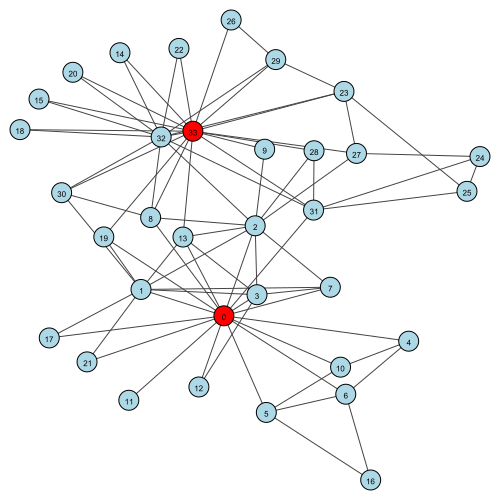

In [65]:
# Set default color for all vertices to 'lightblue'
for v in g.vs:
    v['color'] = 'lightblue'

# Set color for p1 (index 0) and p34 (index 33) to 'red'
g.vs[0]['color'] = 'red'  # p1
g.vs[33]['color'] = 'red'  # p34

# Plot the graph with highlighted nodes
ig.plot(g, 
        bbox=(0, 0, 500, 500),
        vertex_size=20,
        vertex_label=g.vs.indices,
        vertex_label_size=8,
        edge_width=1,
        edge_arrow_size=0.5)

In [66]:
# Get all shortest paths between p1 and p34
paths = g.get_all_shortest_paths('p1', 'p34')

# Get the nodes in the shortest paths
shortest_path_nodes = set()
for path in paths:
    shortest_path_nodes.update(path)

# Set colors for visualization
# Red for p1 and p34, yellow for intermediate nodes, lightblue for others
for v in g.vs:
    if v.index in [0, 33]:  # p1 and p34
        v['color'] = 'red'
    elif v.index in shortest_path_nodes:
        v['color'] = 'yellow'
    else:
        v['color'] = 'lightblue'

# Plot the graph
ig.plot(g, 
        bbox=(0, 0, 500, 500),
        vertex_size=20,
        vertex_label=g.vs.indices,
        vertex_label_size=8,
        edge_width=1,
        edge_arrow_size=0.5)

# Print the paths in a more readable format
print("\nShortest paths between p1 and p34:")
for path in paths:
    path_names = ['p' + str(i+1) for i in path]
    print(" -> ".join(path_names))

ValueError: no such vertex: 'p1'

### **Détection des communautés**

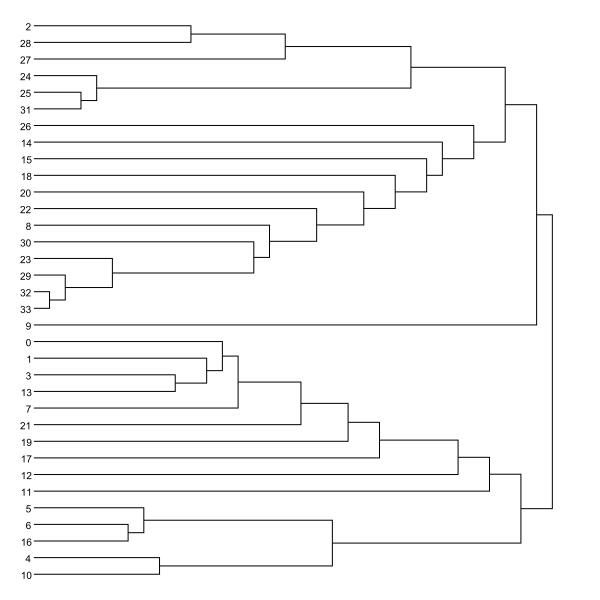

In [67]:
# dendogram
dendogram = g.community_edge_betweenness()
ig.plot(dendogram)

In [68]:
# split to 2 clusters
clusters = dendogram.as_clustering(n=2)
print(clusters)

Clustering with 34 elements and 2 clusters
[0] 0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21
[1] 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33


Cluster sizes:
   Cluster  Size
0        0    15
1        1    19

Detailed membership counts:
0    15
1    19
Name: count, dtype: int64


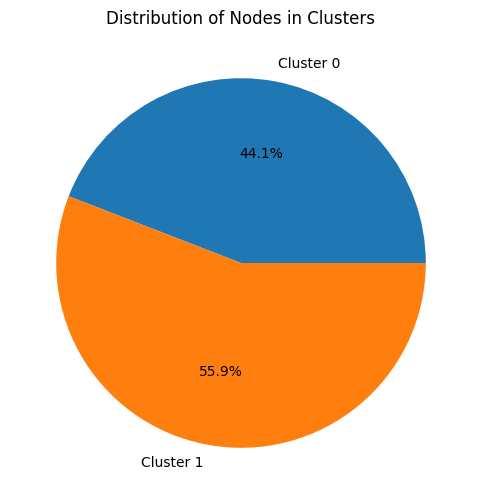

In [79]:
# Get the sizes of each cluster
cluster_sizes = clusters.sizes()

# Create a summary DataFrame
cluster_summary = pd.DataFrame({
    'Cluster': [0, 1],
    'Size': cluster_sizes
})

# Calculate and display group membership counts
membership_counts = pd.Series(membership).value_counts().sort_index()

print("Cluster sizes:")
print(cluster_summary)
print("\nDetailed membership counts:")
print(membership_counts)

# Optional: Create a pie chart to visualize the distribution
plt.figure(figsize=(8, 6))
plt.pie(cluster_sizes, labels=[f'Cluster {i}' for i in range(len(cluster_sizes))], autopct='%1.1f%%')
plt.title('Distribution of Nodes in Clusters')
plt.show()

C:\Users\lcisse\AppData\Local\Temp\ipykernel_8236\3723307306.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vertex_sizes = [20 + degree_centrality[i] * 2 for i in range(len(degree_centrality))]


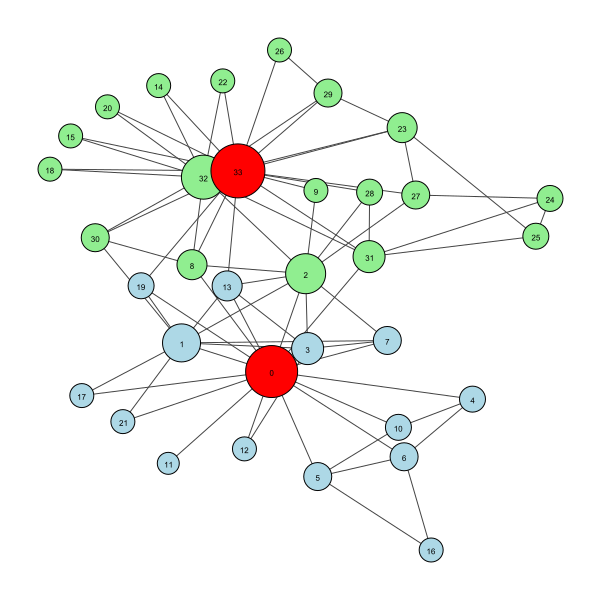

In [80]:
# Set colors for vertices based on their cluster membership
colors = ['lightblue' if m == 0 else 'lightgreen' for m in membership]

# Highlight the most central nodes (p1 and p34) in red
colors[0] = 'red'  # p1
colors[33] = 'red'  # p34

# Set vertex size based on degree centrality
vertex_sizes = [20 + degree_centrality[i] * 2 for i in range(len(degree_centrality))]

# Create the plot
ig.plot(g, 
    bbox=(0, 0, 600, 600),
    vertex_color=colors,
    vertex_size=vertex_sizes,
    vertex_label=g.vs.indices,
    vertex_label_size=8,
    edge_width=1,
    edge_arrow_size=0.5,
    margin=50)

### **Matrice de modularité**

In [81]:
# Calculate modularity matrix using g.modularity_matrix()
modularity_matrix = g.modularity_matrix()

# Convert to numpy array for easier manipulation
modularity_matrix_np = np.array(modularity_matrix)

# Print dimensions and type
print("Shape of modularity matrix:", modularity_matrix_np.shape)
print("Type of modularity matrix:", type(modularity_matrix_np))

# Optional: Display first few rows and columns to verify content
print("\nFirst 5x5 elements of modularity matrix:")
print(modularity_matrix_np[:5, :5])

Shape of modularity matrix: (34, 34)
Type of modularity matrix: <class 'numpy.ndarray'>

First 5x5 elements of modularity matrix:
[[-1.64102564  0.07692308 -0.02564103  0.38461538  0.69230769]
 [ 0.07692308 -0.51923077  0.42307692  0.65384615 -0.17307692]
 [-0.02564103  0.42307692 -0.64102564  0.61538462 -0.19230769]
 [ 0.38461538  0.65384615  0.61538462 -0.23076923 -0.11538462]
 [ 0.69230769 -0.17307692 -0.19230769 -0.11538462 -0.05769231]]


In [83]:
# Calculate eigenvalues and eigenvectors of the modularity matrix
eigenvalues, eigenvectors = np.linalg.eig(modularity_matrix_np)

# Display the first few eigenvalues
print("\nFirst few eigenvalues:")
print(eigenvalues[:5])


First few eigenvalues:
[-5.59249634+0.j  4.97708023+0.j  3.04278102+0.j -3.45111371+0.j
 -3.12663799+0.j]
